In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
traindata=pd.read_csv("data/train.csv")
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
y=traindata.SalePrice
features=['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X=traindata[features]

In [4]:
xtrain,xval,ytrain,yval=train_test_split(X,y,random_state=0)

In [5]:
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(xtrain,ytrain)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(xval)
val_mae = mean_absolute_error(val_predictions, yval)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 32,966


In [6]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [7]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
m=1000000
t=0
for i in candidate_max_leaf_nodes:
    j=get_mae(i,xtrain,xval,ytrain,yval)
    print(i,": {:,.0f}".format(j))
    if(j<m):
        m=j
        t=i
best_tree_size = t
print("best_tree_size: {}".format(best_tree_size))

5 : 35,190
25 : 28,502
50 : 27,826
100 : 28,653
250 : 31,738
500 : 32,662
best_tree_size: 50


In [8]:
candidate_max_leaf_nodes =np.linspace(5,500,50,dtype='int')
val=np.ones(50)
trn=np.ones(50)

In [9]:
for i in range(50):
    val[i]=get_mae(candidate_max_leaf_nodes[i],xtrain,xval,ytrain,yval)
    trn[i]=get_mae(candidate_max_leaf_nodes[i],xtrain,xtrain,ytrain,ytrain)

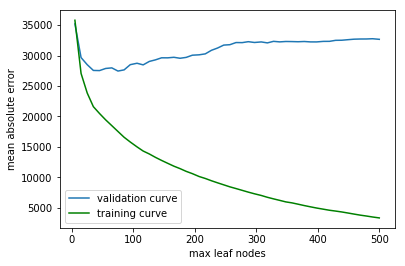

In [10]:
plt.plot(candidate_max_leaf_nodes,val,label='validation curve')
plt.plot(candidate_max_leaf_nodes,trn,label='training curve',c='green')
plt.xlabel('max leaf nodes')
plt.ylabel('mean absolute error')
plt.legend()
plt.show()

In [11]:
# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
iowa_model.fit(xtrain, ytrain)
val_predictions = iowa_model.predict(xval)
val_mae = mean_absolute_error(val_predictions, yval)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 27,826


In [12]:
#training on complete training data
iowa_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=50, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [13]:
test_data = pd.read_csv("data/test.csv")
test_X = test_data[features]
 
test_preds = iowa_model.predict(test_X)


output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)